In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv("spam.csv", encoding='latin-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [4]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


## from this data it is visible that the last 3 columns are not contributing much and have a lots of null values so we can drop it.

In [5]:
df = df.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1)

In [6]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


## now we will use dummy variable for the target column

In [7]:
dummies = pd.get_dummies(df["v1"],dtype=int)

In [8]:
dummies

,ham,spam
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0
...,...,...
5567,0,1
5568,1,0
5569,1,0
5570,1,0


In [9]:
dummies = pd.get_dummies(df['v1'],dtype="int")
dummies

,ham,spam
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0
...,...,...
5567,0,1
5568,1,0
5569,1,0
5570,1,0


In [10]:
df = pd.concat([df,dummies],axis=1)

In [11]:
df.head()

,v1,v2,ham,spam
0,ham,"Go until jurong point, crazy.. Available only ...",1,0
1,ham,Ok lar... Joking wif u oni...,1,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,0,1
3,ham,U dun say so early hor... U c already then say...,1,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",1,0


In [12]:
df = df.drop(["v1","ham"],axis=1)

In [13]:
df

,v2,spam
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...
5567,This is the 2nd time we have tried 2 contact u...,1
5568,Will Ì_ b going to esplanade fr home?,0
5569,"Pity, * was in mood for that. So...any other s...",0
5570,The guy did some bitching but I acted like i'd...,0


In [14]:
df = df.rename(columns={"v2": "text", "spam": "target"})
df

,text,target
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...
5567,This is the 2nd time we have tried 2 contact u...,1
5568,Will Ì_ b going to esplanade fr home?,0
5569,"Pity, * was in mood for that. So...any other s...",0
5570,The guy did some bitching but I acted like i'd...,0


In [15]:
df.text.info()

<class 'pandas.core.series.Series'>
RangeIndex: 5572 entries, 0 to 5571
Series name: text
Non-Null Count  Dtype 
--------------  ----- 
5572 non-null   object
dtypes: object(1)
memory usage: 43.7+ KB


In [16]:
df.isnull().sum()

text      0
target    0
dtype: int64

In [17]:
df.duplicated().sum()

403

In [18]:
df.drop_duplicates(keep="first",inplace = True)

In [19]:
df

,text,target
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...
5567,This is the 2nd time we have tried 2 contact u...,1
5568,Will Ì_ b going to esplanade fr home?,0
5569,"Pity, * was in mood for that. So...any other s...",0
5570,The guy did some bitching but I acted like i'd...,0


In [20]:
df.duplicated().sum()

0

# EDA

In [21]:
df.target.value_counts()

target
0    4516
1     653
Name: count, dtype: int64

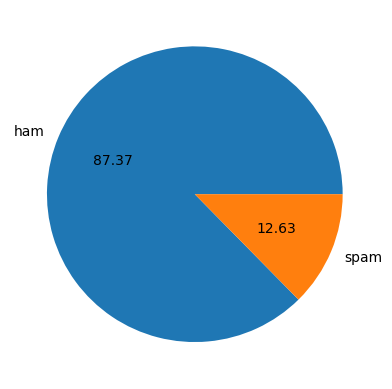

In [22]:
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

## it is visible that data imbalance is there.

In [23]:
import nltk

In [24]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\adity\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
df["num_char"] = df['text'].apply(len)
df

,text,target,num_char
0,"Go until jurong point, crazy.. Available only ...",0,111
1,Ok lar... Joking wif u oni...,0,29
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,U dun say so early hor... U c already then say...,0,49
4,"Nah I don't think he goes to usf, he lives aro...",0,61
...,...,...,...
5567,This is the 2nd time we have tried 2 contact u...,1,161
5568,Will Ì_ b going to esplanade fr home?,0,37
5569,"Pity, * was in mood for that. So...any other s...",0,57
5570,The guy did some bitching but I acted like i'd...,0,125


In [26]:
df["num_word"] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [27]:
df

,text,target,num_char,num_word
0,"Go until jurong point, crazy.. Available only ...",0,111,24
1,Ok lar... Joking wif u oni...,0,29,8
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37
3,U dun say so early hor... U c already then say...,0,49,13
4,"Nah I don't think he goes to usf, he lives aro...",0,61,15
...,...,...,...,...
5567,This is the 2nd time we have tried 2 contact u...,1,161,35
5568,Will Ì_ b going to esplanade fr home?,0,37,9
5569,"Pity, * was in mood for that. So...any other s...",0,57,15
5570,The guy did some bitching but I acted like i'd...,0,125,27


In [28]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [29]:
df

,text,target,num_char,num_word,num_sentences
0,"Go until jurong point, crazy.. Available only ...",0,111,24,2
1,Ok lar... Joking wif u oni...,0,29,8,2
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37,2
3,U dun say so early hor... U c already then say...,0,49,13,1
4,"Nah I don't think he goes to usf, he lives aro...",0,61,15,1
...,...,...,...,...,...
5567,This is the 2nd time we have tried 2 contact u...,1,161,35,4
5568,Will Ì_ b going to esplanade fr home?,0,37,9,1
5569,"Pity, * was in mood for that. So...any other s...",0,57,15,2
5570,The guy did some bitching but I acted like i'd...,0,125,27,1


In [30]:
df[['num_char','num_word','num_sentences']].describe()

,num_char,num_word,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [31]:
#not spam
df[df['target'] == 0][['num_char','num_word','num_sentences']].describe()

,num_char,num_word,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [32]:
#spam
df[df['target'] == 1][['num_char','num_word','num_sentences']].describe()

,num_char,num_word,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


## it is visible that for spam msgs no. of char, words and sentences are more.. for most of the cases. [ignore the max case]

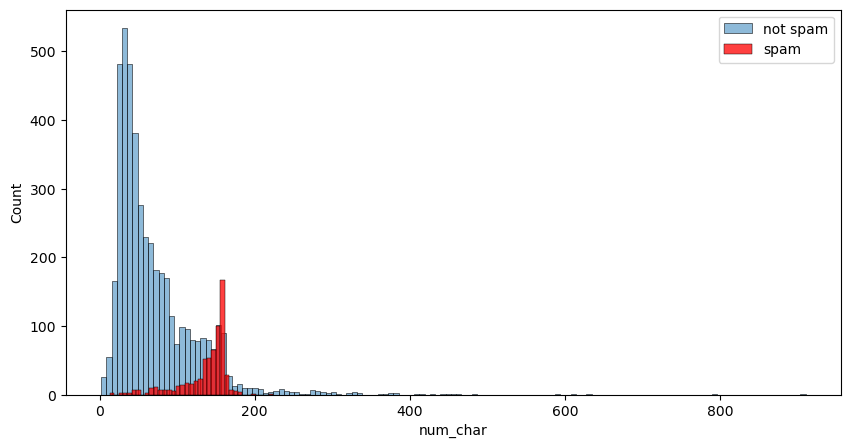

In [33]:
plt.figure(figsize=(10,5))
sns.histplot(df[df['target'] == 0][['num_char']],label='not spam')
sns.histplot(df[df['target'] == 1]['num_char'],color='red',label="spam")
plt.legend()

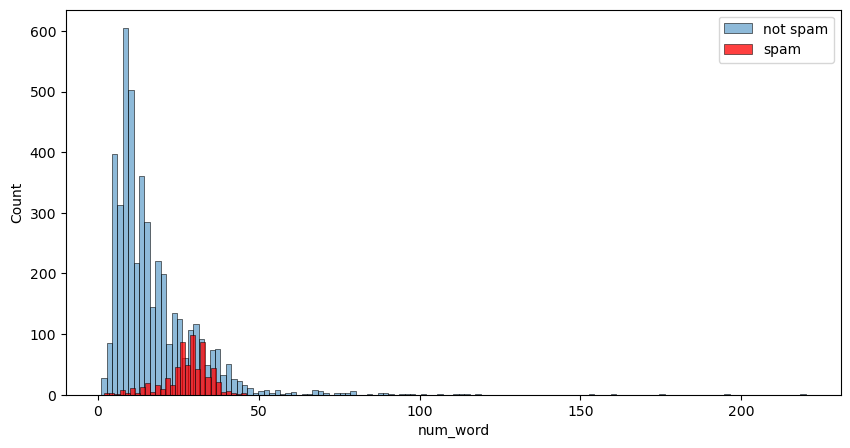

In [34]:
plt.figure(figsize=(10,5))
sns.histplot(df[df['target'] == 0][['num_word']],label='not spam')
sns.histplot(df[df['target'] == 1]['num_word'],color='red',label="spam")
plt.legend()

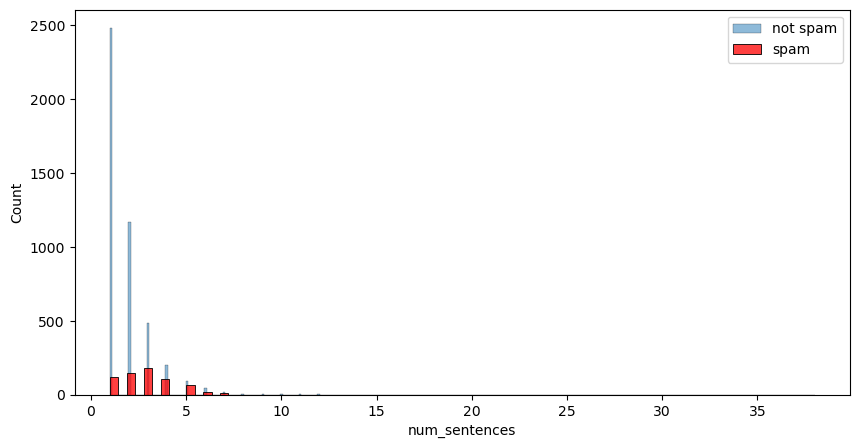

In [35]:
plt.figure(figsize=(10,5))
sns.histplot(df[df['target'] == 0][['num_sentences']],label='not spam')
sns.histplot(df[df['target'] == 1]['num_sentences'],color='red',label="spam")
plt.legend()

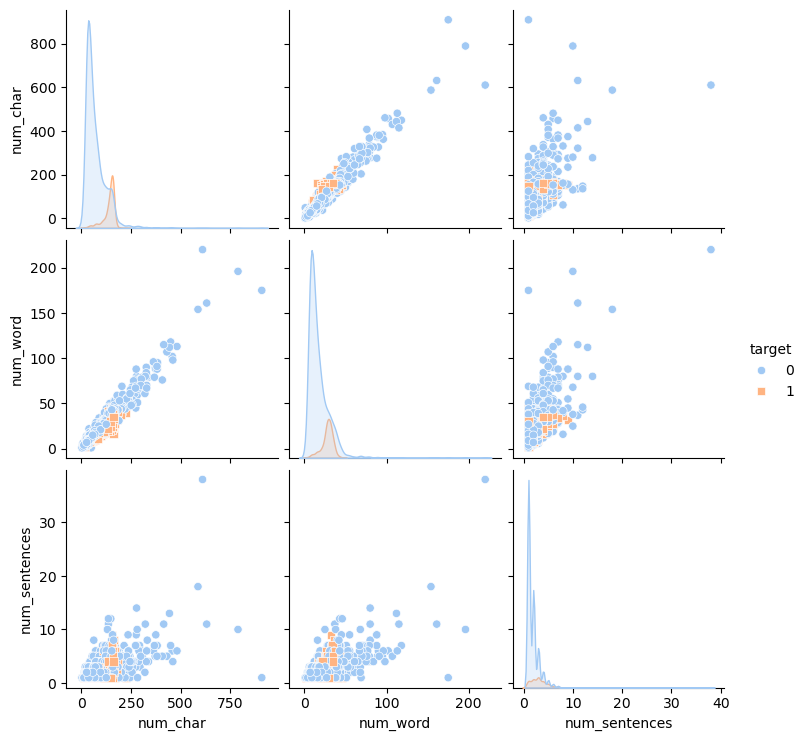

In [36]:
sns.pairplot(df, hue='target', palette='pastel', markers=["o", "s"])


In [37]:
df[['num_char','num_word','num_sentences']].corr()

,num_char,num_word,num_sentences
num_char,1.000000,0.965760,0.624139
num_word,0.965760,1.000000,0.679971
num_sentences,0.624139,0.679971,1.000000


<Axes: >

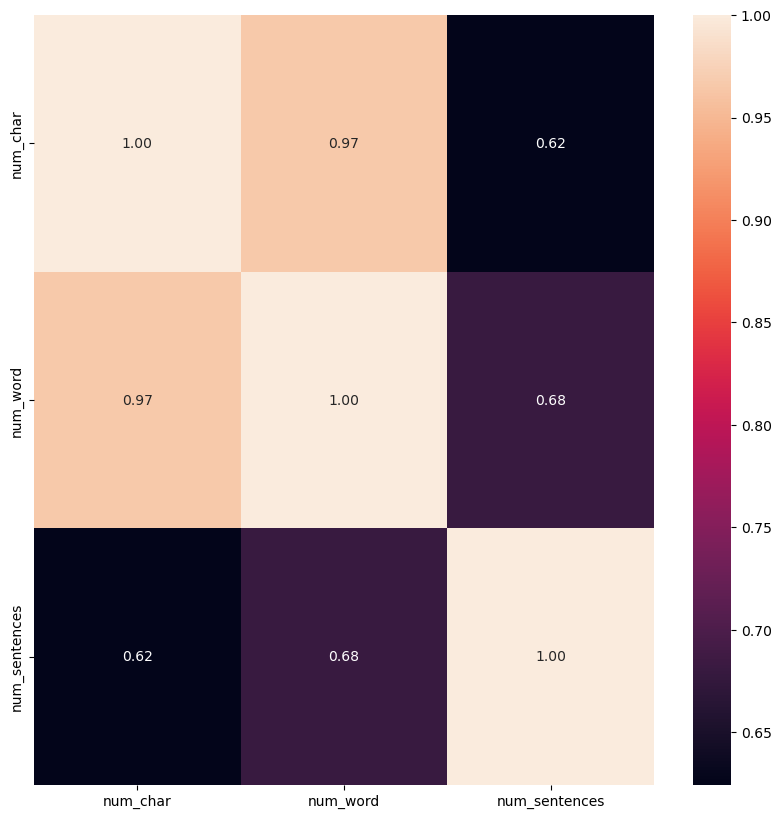

In [38]:
plt.figure(figsize=(10, 10))
sns.heatmap(df[['num_char','num_word','num_sentences']].corr(),annot=True, fmt='.2f')

<Axes: >

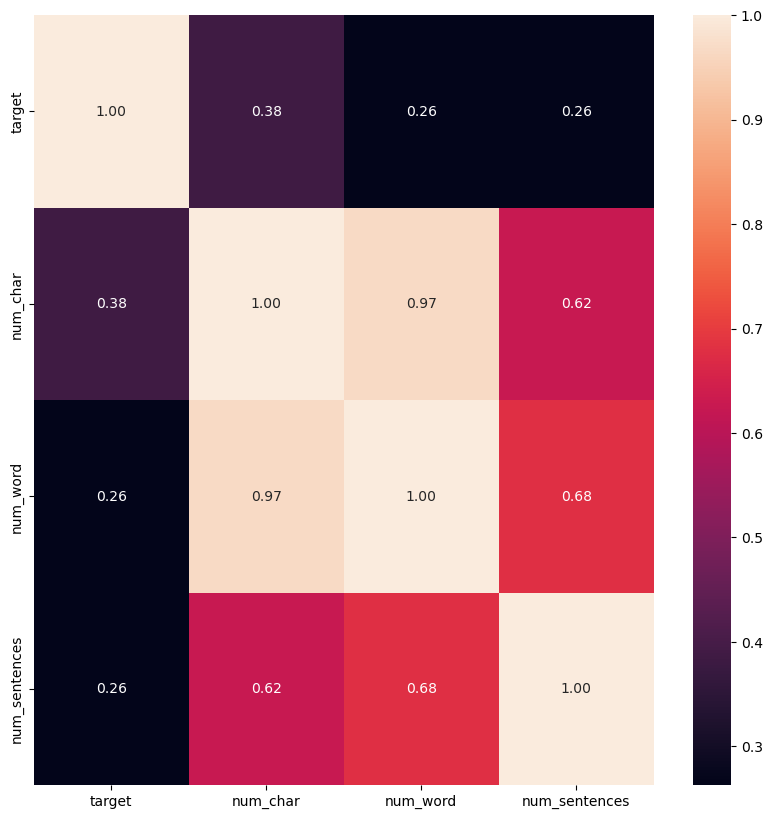

In [39]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(numeric_only=True),annot=True, fmt='.2f')

## strong corellation

# Data Pre-Processing

In [40]:
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import string

ps = PorterStemmer()

In [41]:
def transform_text(text):
    #lowercase
    text = text.lower()
    #Tokenize
    tokens = nltk.word_tokenize(text)
    
    
    processed_words = []
    
    # Alphanumeric & stopwords Filtering and stemming
    for token in tokens:
        
        if token.isalnum() and token not in stopwords.words('english'):
           
            processed_words.append(ps.stem(token))
    
    # Join the processed words back into a single string and return
    return " ".join(processed_words)


In [42]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [43]:
df['transformed_text'] = df['text'].apply(transform_text)

In [44]:
df.head()

,text,target,num_char,num_word,num_sentences,transformed_text
0,"Go until jurong point, crazy.. Available only ...",0,111,24,2,go jurong point crazi avail bugi n great world...
1,Ok lar... Joking wif u oni...,0,29,8,2,ok lar joke wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,U dun say so early hor... U c already then say...,0,49,13,1,u dun say earli hor u c alreadi say
4,"Nah I don't think he goes to usf, he lives aro...",0,61,15,1,nah think goe usf live around though


In [45]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

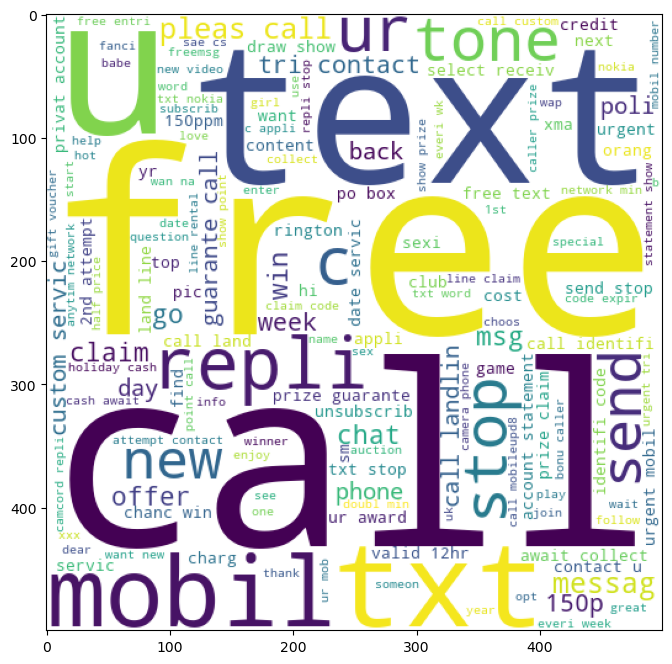

In [46]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,8))
plt.imshow(spam_wc)

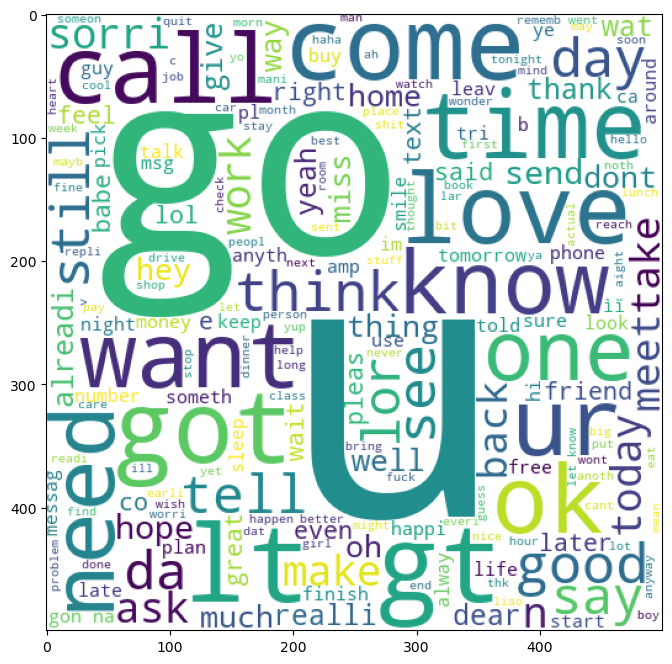

In [47]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15, 8)) 
plt.imshow(ham_wc)


In [48]:
df

,text,target,num_char,num_word,num_sentences,transformed_text
0,"Go until jurong point, crazy.. Available only ...",0,111,24,2,go jurong point crazi avail bugi n great world...
1,Ok lar... Joking wif u oni...,0,29,8,2,ok lar joke wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,U dun say so early hor... U c already then say...,0,49,13,1,u dun say earli hor u c alreadi say
4,"Nah I don't think he goes to usf, he lives aro...",0,61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,This is the 2nd time we have tried 2 contact u...,1,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,Will Ì_ b going to esplanade fr home?,0,37,9,1,b go esplanad fr home
5569,"Pity, * was in mood for that. So...any other s...",0,57,15,2,piti mood suggest
5570,The guy did some bitching but I acted like i'd...,0,125,27,1,guy bitch act like interest buy someth els nex...


In [49]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [50]:
spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [51]:
len(spam_corpus)

9939

In [52]:
from collections import Counter

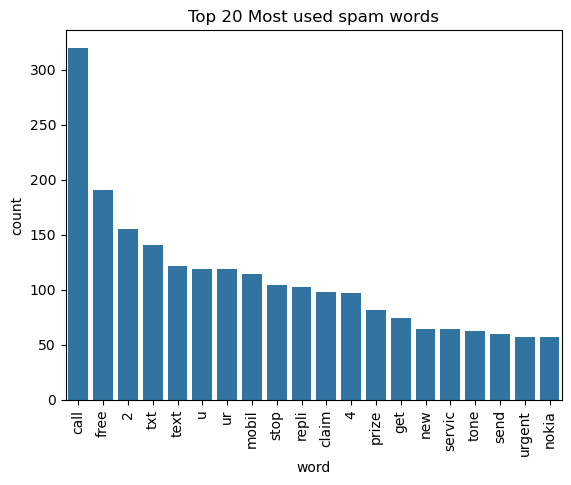

In [53]:
plt.title("Top 20 Most used spam words")
spam_corpus_counter = pd.DataFrame(Counter(spam_corpus).most_common(20), columns=['word', 'count'])
sns.barplot(x='word', y='count', data=spam_corpus_counter)
plt.xticks(rotation='vertical')
plt.show()

In [54]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [55]:
len(ham_corpus)

35404

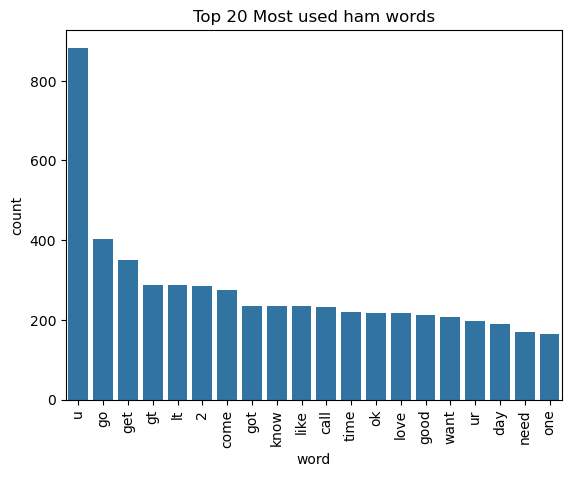

In [56]:
plt.title("Top 20 Most used ham words")
ham_corpus_counter = pd.DataFrame(Counter(ham_corpus).most_common(20), columns=['word', 'count'])
sns.barplot(x='word', y='count', data=ham_corpus_counter)
plt.xticks(rotation='vertical')
plt.show()

# Model Choosing 

In [57]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [58]:
X = tfidf.fit_transform(df['transformed_text']).toarray()
X.shape

(5169, 3000)

In [59]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [61]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier

In [62]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)

In [68]:
models = {
    'SVC': svc,
    'KNeighbors': knc,
    'MultinomialNB': mnb,
    'DecisionTree': dtc,
    'LogisticRegression': lrc,
    'RandomForest': rfc,
    'AdaBoost': abc,    
    'ExtraTreesClassifier': etc,
}

In [69]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [70]:
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

In [71]:
def cross_val_evaluation(clf, X, y):
    accuracies = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
    precisions = cross_val_score(clf, X, y, cv=5, scoring='precision')
    recalls = cross_val_score(clf, X, y, cv=5, scoring='recall')
    f1s = cross_val_score(clf, X, y, cv=5, scoring='f1')
    
    return np.mean(accuracies), np.mean(precisions), np.mean(recalls), np.mean(f1s)

In [72]:
for name, model in models.items():
    print(f"Evaluating {name}...")
    accuracy, precision, recall, f1 = cross_val_evaluation(model, X_train, y_train)
    
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-Score: {f1}")
    print("-" * 40)

Evaluating SVC...
Accuracy: 0.9750906892382105
Precision: 0.9636643414286066
Recall: 0.837538185085355
F1-Score: 0.8956437116669542
----------------------------------------
Evaluating KNeighbors...
Accuracy: 0.9081015719467956
Precision: 0.9878787878787879
Recall: 0.28548068283917344
F1-Score: 0.4425885405693853
----------------------------------------
Evaluating MultinomialNB...
Accuracy: 0.9697702539298672
Precision: 0.9925270703065425
Recall: 0.7695058400718778
F1-Score: 0.8665009012259557
----------------------------------------
Evaluating DecisionTree...
Accuracy: 0.9363966142684401
Precision: 0.8441595149722099
Recall: 0.6106558849955077
F1-Score: 0.7088984772015394
----------------------------------------
Evaluating LogisticRegression...
Accuracy: 0.950423216444982
Precision: 0.9274722123318904
Recall: 0.6673135669362085
F1-Score: 0.7750020679574311
----------------------------------------
Evaluating RandomForest...
Accuracy: 0.9721886336154777
Precision: 0.9887078438802577
Reca

C:\Users\adity\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\adity\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\adity\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\adity\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use t

Accuracy: 0.9634824667472793
Precision: 0.9113476595035817
Recall: 0.7921114106019768
F1-Score: 0.8471740359801687
----------------------------------------
Evaluating ExtraTreesClassifier...
Accuracy: 0.9750906892382105
Precision: 0.9732596787987395
Recall: 0.8279964061096138
F1-Score: 0.8945408539394746
----------------------------------------


In [85]:
performance_df = pd.DataFrame({
    'Algorithm': models.keys(),
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1-Score': f1_scores
}).sort_values('Precision', ascending=False)

In [86]:
performance_df

,Algorithm,Accuracy,Precision,Recall,F1-Score
2,MultinomialNB,0.969770,0.992527,0.769506,0.866501
5,RandomForest,0.972189,0.988708,0.792165,0.878649
1,KNeighbors,0.908102,0.987879,0.285481,0.442589
7,ExtraTreesClassifier,0.975091,0.973260,0.827996,0.894541
0,SVC,0.975091,0.963664,0.837538,0.895644
4,LogisticRegression,0.950423,0.927472,0.667314,0.775002
6,AdaBoost,0.963482,0.911348,0.792111,0.847174
3,DecisionTree,0.936397,0.844160,0.610656,0.708898


<Figure size 2000x1100 with 0 Axes>

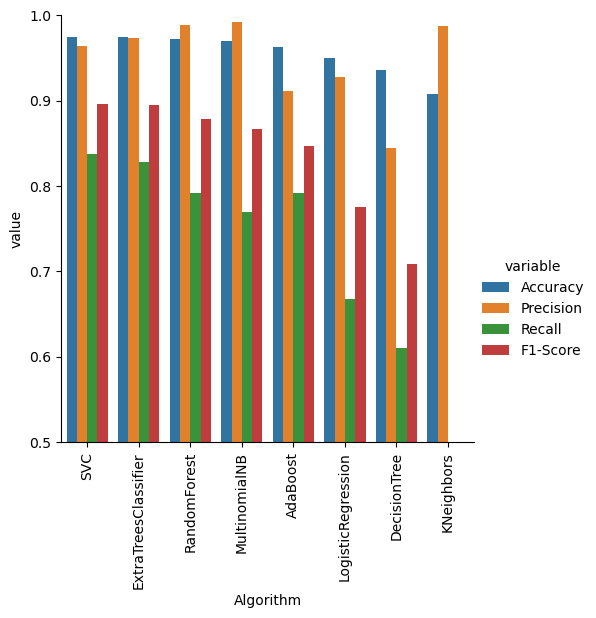

In [79]:
plt.figure(figsize=(20,11))
performance_df1 = pd.melt(performance_df, id_vars="Algorithm")

sns.catplot(x='Algorithm', y='value', 
            hue='variable', data=performance_df1, kind='bar', height=5)
plt.ylim(0.5, 1.0)
plt.xticks(rotation='vertical')
plt.show()

- Accuracy: How often the model makes correct predictions.
- Precision: The ratio of true positives to all positive predictions, important when false positives are costly.
- Recall: The ratio of true positives to all actual positives, important when false negatives are costly.
- F1-Score: The harmonic mean of precision and recall, useful when you want a balance between precision and recall.

## If you want a balance between precision and recall, SVC is likely the best overall choice,<br>as it has the highest F1-Score. However, if precision is your priority, you may want to consider MultinomialNB. <br>

# so we are choosing Naive Bayes (multinominalNB)